In [15]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv('credit_card.csv')

In [16]:
credit.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [17]:
print("data yang NULL : \n",credit.isnull().sum())
print("data yang kosong : \n",credit.empty)
print("data yang NAN : \n",credit.isna().sum())

data yang NULL : 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data yang kosong : 
 False
data yang NAN : 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [18]:
df_credit = credit.drop(columns=['Sl_No','Customer Key'],axis=1)
df_credit.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<Axes: >

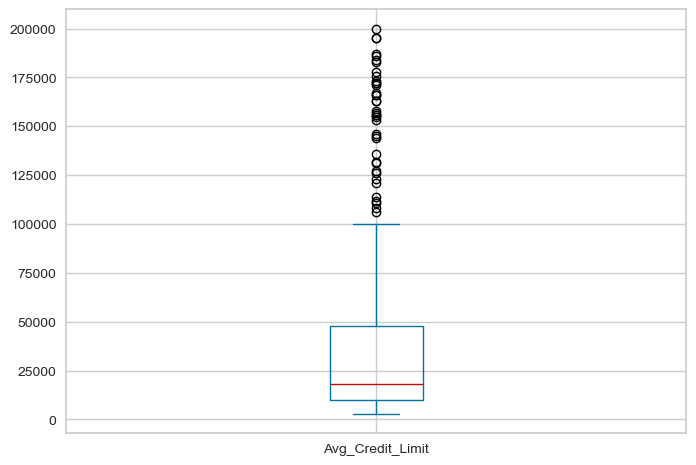

In [19]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

jumlah baris sebelum dibuang 660
jumlah baris setelah dibuang 621


<Axes: >

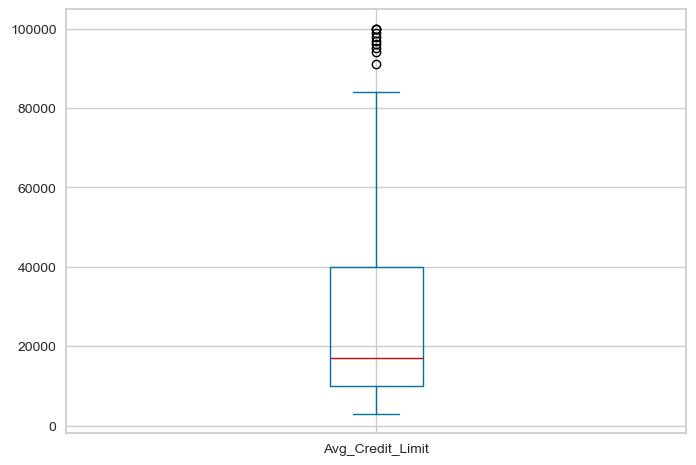

In [20]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier):
    if is_numeric_dtype(data_frame[kolom_outlier]):
        Q1 = data_frame[kolom_outlier].quantile(0.25)
        Q3 = data_frame[kolom_outlier].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data_frame_out = data_frame.loc[(data_frame[kolom_outlier] >= lower) & (data_frame[kolom_outlier] <= upper)]
    return data_frame_out

print("jumlah baris sebelum dibuang",df_credit.shape[0])
data_bersih = remove_outlier(df_credit, 'Avg_Credit_Limit')
print("jumlah baris setelah dibuang",data_bersih.shape[0])

data_bersih['Avg_Credit_Limit'].plot(kind='box')

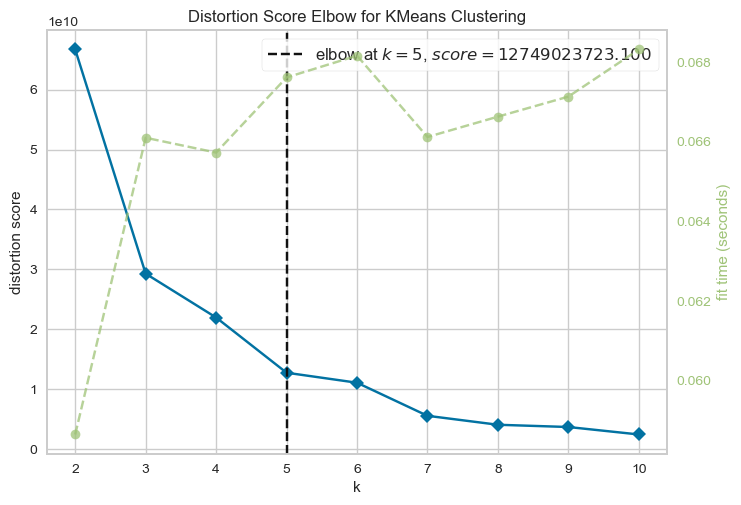

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

kMeansC = KMeans(random_state=0)
vis = KElbowVisualizer(kMeansC, k=(2,11))
vis.fit(data_bersih)
vis.show()

Sillphouette Score untuk K =  2  adalah  0.7275517813087928
Sillphouette Score untuk K =  3  adalah  0.7058100919802311
Sillphouette Score untuk K =  4  adalah  0.5928895843252326
Sillphouette Score untuk K =  5  adalah  0.6039773808643728
Sillphouette Score untuk K =  6  adalah  0.6277644646724014
Sillphouette Score untuk K =  7  adalah  0.5982458585108931
Sillphouette Score untuk K =  8  adalah  0.5918608587737609
Sillphouette Score untuk K =  9  adalah  0.6076626138462472
Sillphouette Score untuk K =  10  adalah  0.602252160272088


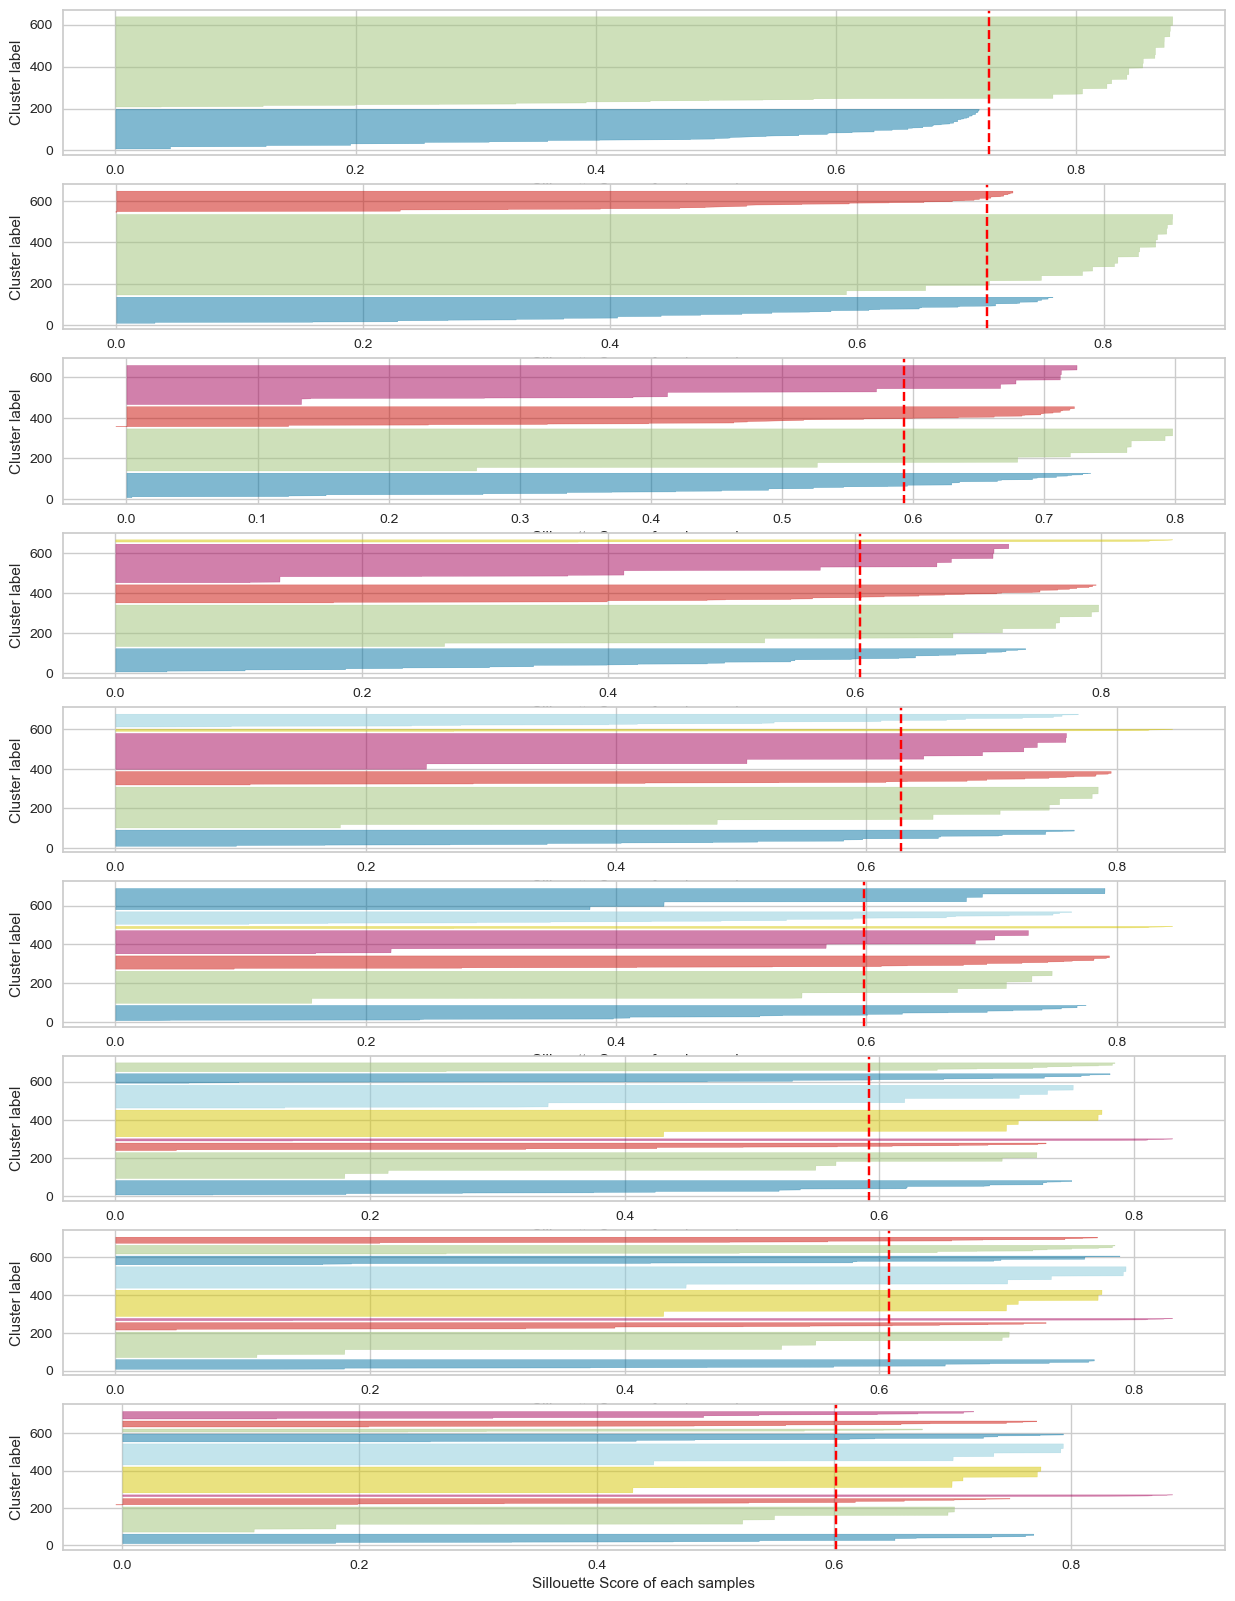

In [22]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,ax=plt.subplots(9,1,figsize=(15,20))

for k in np.arange(2,11):
    kMeansC = KMeans(n_clusters=k,init='k-means++' , random_state=15)
    df_clean = data_bersih
    KM_cluster = kMeansC.fit_predict(df_clean)
    print("Sillphouette Score untuk K = ",k," adalah ",silhouette_score(df_clean,KM_cluster))

    sil_vis = SilhouetteVisualizer(kMeansC,colors='yellowbrick',ax=ax[k-2])
    sil_vis.fit(df_clean)

    ax[k-2].set(xlabel="Sillouette Score of each samples", ylabel="Cluster label")

In [23]:
df_clean.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

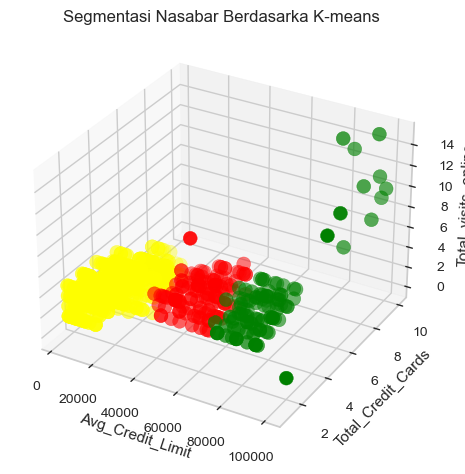

Sillouette Score untuk K-means: 0.706 


In [24]:
kmeas = KMeans(n_clusters=3,init='k-means++',random_state=15)
k_clusters = kmeas.fit_predict(df_clean)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blu', 4: 'magenta', 5: 'bleck', 6:'cyan'}

ax.scatter(df_clean['Avg_Credit_Limit'],df_clean['Total_Credit_Cards'],df_clean['Total_visits_online'],c=[cluster_colors[i] for i in k_clusters],s=100)

plt.title('Segmentasi Nasabar Berdasarka K-means')
ax.set_xlabel('Avg_Credit_Limit')
ax.set_ylabel('Total_Credit_Cards')
ax.set_zlabel('Total_visits_online')
plt.show()

print("Sillouette Score untuk K-means: %0.3f " % silhouette_score(df_clean,k_clusters))

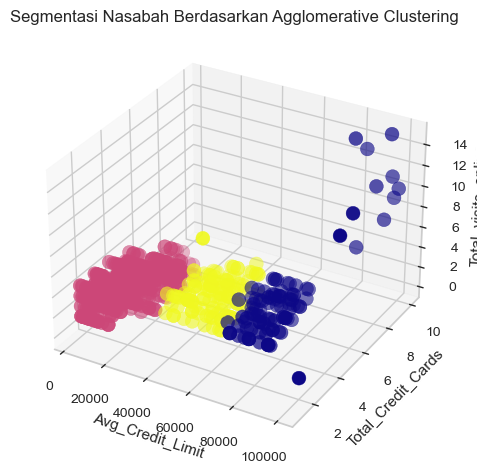

Sillouette Score untuk Agglomerative Clustering: 0.705 


In [25]:
import seaborn as sns
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters=3,linkage='ward')

AGG_cluster = AGG.fit_predict(df_clean)
cmap = ListedColormap(sns.color_palette('plasma',256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(df_clean['Avg_Credit_Limit'],df_clean['Total_Credit_Cards'],df_clean['Total_visits_online'],c=AGG_cluster,cmap=cmap,s=100)

plt.title('Segmentasi Nasabah Berdasarkan Agglomerative Clustering')
ax.set_xlabel('Avg_Credit_Limit')
ax.set_ylabel('Total_Credit_Cards')
ax.set_zlabel('Total_visits_online')
plt.show()

print("Sillouette Score untuk Agglomerative Clustering: %0.3f " % silhouette_score(df_clean,AGG_cluster))

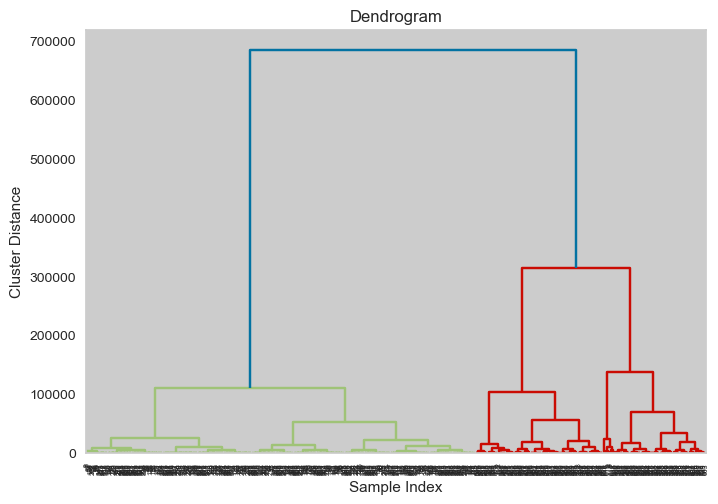

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(df_clean, 'ward')
dendrogram(linkage_array)

plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")
plt.title("Dendrogram")
plt.show()

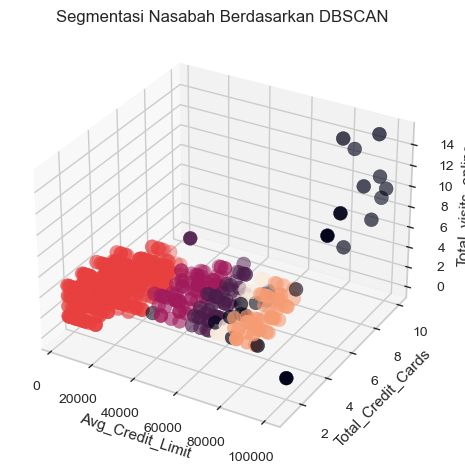

Sillouette Score untuk DBSCAN: 0.657 


In [27]:
DBSC = DBSCAN(eps=2500,min_samples=20)

DBSC_cluster = DBSC.fit_predict(df_clean)

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette('rocket',256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(df_clean['Avg_Credit_Limit'],df_clean['Total_Credit_Cards'],df_clean['Total_visits_online'],c=DBSC_cluster,cmap=cmap,s=100)

plt.title('Segmentasi Nasabah Berdasarkan DBSCAN')
ax.set_xlabel('Avg_Credit_Limit')
ax.set_ylabel('Total_Credit_Cards')
ax.set_zlabel('Total_visits_online')
plt.show()

print("Sillouette Score untuk DBSCAN: %0.3f " % silhouette_score(df_clean,DBSC_cluster))

In [30]:
import pickle

with open('KMeans_model.pkl','wb') as r:
    pickle.dump(kmeas,r)

with open('AGG_model.pkl','wb') as r:
    pickle.dump(AGG,r)

with open('DBSCAN_model.pkl','wb') as r:
    pickle.dump(DBSC,r)

print("Model KMeans, Agglomerative, dan DBSCAN telah disimpan")

Model KMeans, Agglomerative, dan DBSCAN telah disimpan
